# Holoviews and Datashader
Datashader is a library that extends Bokeh and it is useul for plotting large quantity of data points. Using Datashader is highly recommended when dealing with more than a million data points, especially when other plotting libraries have trouble visualising the data. Datashader uses aggregation to visualise data, which means we are not seeing every single data point rather an aggregated form of the data. The output of datashader is an image, which can be used by other libraries. Holoviews is one of the packages which is based on bokeh and take advantage of Datashader for ploting large datasets.<br>
Datashader only supports a few types of plots:
- Scatter plots and heatmaps
- Trajectories
- Rasters

In [2]:
import datashader as ds

/home/pooya/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import pandas as pd
import numpy as np

np.random.seed(1)
num=10000

dists = {cat: pd.DataFrame(dict(x=np.random.normal(x,s,num),
                                y=np.random.normal(y,s,num),
                                val=val,cat=cat))
         for x,y,s,val,cat in 
         [(2,2,0.01,10,"d1"), (2,-2,0.1,20,"d2"), (-2,-2,0.5,30,"d3"), (-2,2,1.0,40,"d4"), (0,0,3,50,"d5")]}

df = pd.concat(dists,ignore_index=True)
df["cat"]=df["cat"].astype("category")
df.tail()

,x,y,val,cat
49995,-1.397579,0.610189,50,d5
49996,-2.649610,3.080821,50,d5
49997,1.933360,0.243676,50,d5
49998,4.306374,1.032139,50,d5
49999,-0.493567,-2.242669,50,d5


CPU times: user 632 ms, sys: 30.6 ms, total: 663 ms
Wall time: 733 ms


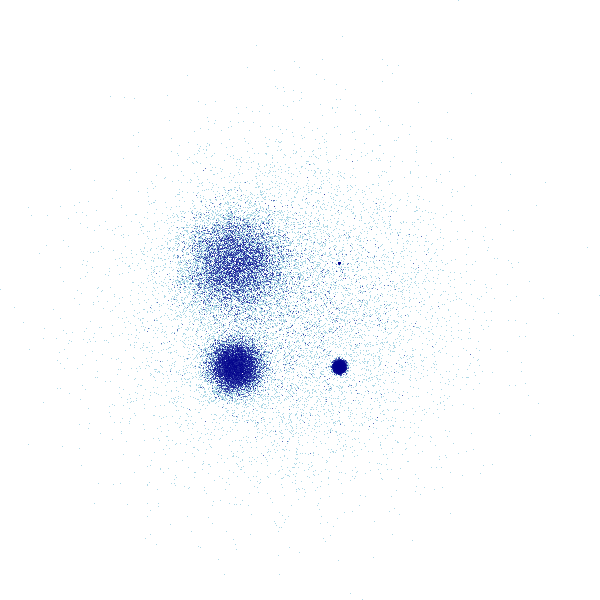

In [4]:
import datashader as ds
import datashader.transfer_functions as tf

%time tf.shade(ds.Canvas().points(df,'x','y'))